<a href="https://colab.research.google.com/github/yurystepanets/ds_find_number/blob/main/SGA_unit6_NBC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BestPractices/MATHML-2. NativeBayesClasiffier/spam_or_not_spam.csv', sep=',')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [30]:
# рассчитайте частоты для классов : ваш код здесь
df_classes = df['label'].value_counts()
df_classes

0    2500
1     500
Name: label, dtype: int64

<Axes: xlabel='label'>

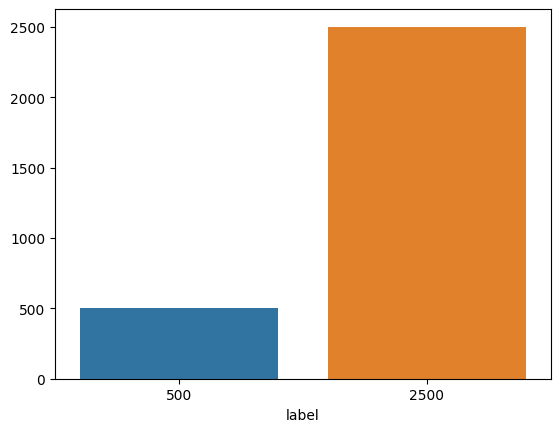

In [31]:
# визуализируйте результат: ваш код здесь
sns.barplot(data=df_classes, x=df_classes.index, y=df_classes.values)

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [33]:
# clean up string from spaces
def cleanUp(s):
  if isinstance(s,str):
    if s.count(" ") == len(s):
      s = s.replace(" ", "")
    if s=="":
      return np.nan
  return s

# apply cleanUp function to emails
df['email'] = df['email'].apply(cleanUp)
#delete Nan
df.dropna(axis=0, inplace=True)
df.isna()['email'].value_counts()

False    2997
Name: email, dtype: int64

Переводим данные в векторный вид:

In [34]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["email"])


Определите, сколько теперь признаков в нашем наборе данных:

In [35]:
val = X.shape[1]
print(f'признаков в нашем наборе данных: {val}')

признаков в нашем наборе данных: 34116


## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [36]:
X=X
y=df['label']

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75, test_size=0.25, random_state=42, stratify=y)

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [38]:
val = round(y_test.mean(),3)
print(f'Cреднее значение целевой переменной по тестовой выборке: {val}')

Cреднее значение целевой переменной по тестовой выборке: 0.165


## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [39]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
clf =  MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

Accuracy: 0.987
Recall: 0.919
F1: 0.958
Precision: 1.0
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       626
           1       1.00      0.92      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750



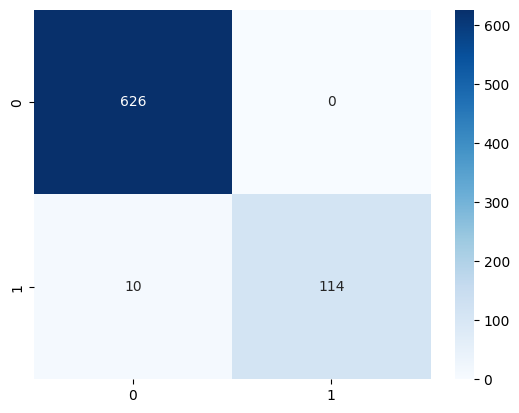

In [40]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.metrics import confusion_matrix, classification_report
print(f"Accuracy: {round(accuracy_score(y_test, y_test_pred),3)}")
print(f"Recall: {round(recall_score(y_test, y_test_pred),3)}")
print(f"F1: {round(f1_score(y_test, y_test_pred),3)}")
print(f"Precision: {round(precision_score(y_test, y_test_pred),3)}")
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='', cmap='Blues')
print(classification_report(y_test, y_test_pred))

Нарисуйте ROC-кривую:

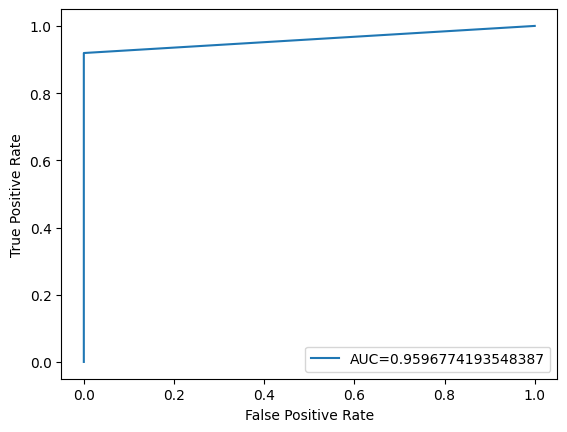

In [41]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_test_pred)
auc = metrics.roc_auc_score(y_test, y_test_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

**ВЫВОДЫ**  по графику ROC/AUC (Reciever Operating Characteristic) и AUC(Area Under Curve) мы видим отличные результаты. ROC показывает отличное качество и AUC близка к нулю.  По метрикам классификации Precision и Recall тоже показывают хорошие результаты. Метрику Accuracy использовать затруднительно ввиду несбалансированности классов.

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB, ComplementNB

param_distributions = {'alpha': list(np.linspace(0.001, 1, 1000, dtype=float)) }
            
grid_search_nb = GridSearchCV(
    estimator = MultinomialNB(), 
    param_grid=param_distributions, 
    cv=5, 
    n_jobs = -1
)  
%time grid_search_nb.fit(X_train, y_train) 
y_test_pred = grid_search_nb.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print('Precision на тестовом наборе: {:.2f}'.format(metrics.precision_score(y_test, y_test_pred)))
print('Recall на тестовом наборе: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_nb.best_params_))

CPU times: user 2.3 s, sys: 154 ms, total: 2.45 s
Wall time: 41.1 s
f1_score на тестовом наборе: 0.98
Precision на тестовом наборе: 0.99
Recall на тестовом наборе: 0.96
Наилучшие значения гиперпараметров: {'alpha': 0.081}
